In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
import csv



In [86]:
data = open("train.csv")

f = data.readlines()

count = 0
for i in f:
    count+= 1
count-=1
#print(count)

data1 = open("test.csv")

f1 = data1.readlines()

count1 = 0
for j in f1:
    count1+= 1
#count1=-1    
#print(count1)

divider = 0.90

X_train = np.zeros((int(count*divider),784), dtype=np.int16)
Y_train = np.zeros((int(count*divider),1), dtype=np.int16)
X_validation = np.zeros((int((1-divider)*count),784), dtype=np.int16)
Y_validation = np.zeros((int((1-divider)*count),1), dtype=np.int16)
X_test = np.zeros((int(count1),784), dtype=np.uint8)

for i in range(1,count):
    line = f[i].split(",")

    if i < divider*count:
        Y_train[i-1] = line[0]
        X_train[i-1] = line[1:]
    else:
        Y_validation[i-int(divider*count)-1] = line[0]
        X_validation[i-int(divider*count)-1] = line[1:]
        
        
for j in range(1,count1):
    line1=f1[j].split(",")
    
    X_test[j-1]=line1[:]
 
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)


(37800, 784)
(4199, 784)
(28001, 784)


[4]


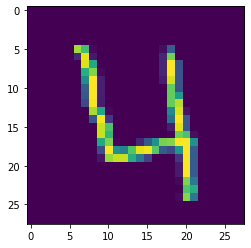

[0]


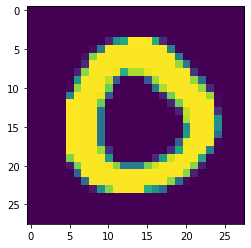

[0]


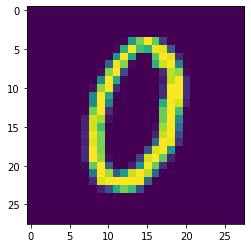

[7]


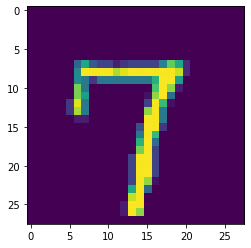

[3]


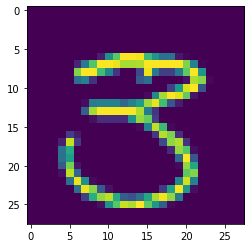

[5]


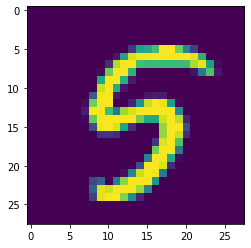

[3]


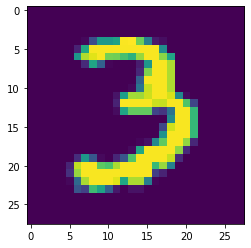

In [87]:
for i in range(3,10):
    print(Y_train[i])
    img = np.reshape(X_train[i],(28,28),order="C")
    plt.imshow(img)
    plt.show()

In [88]:
y_train_oh = keras.utils.to_categorical(Y_train, 10)
y_val_oh = keras.utils.to_categorical(Y_validation, 10)
print(y_train_oh.shape)

(37800, 10)


In [89]:
s = tf.InteractiveSession()

In [90]:
input_X = tf.placeholder(tf.float64, shape=(None, 784)) 
input_y = tf.placeholder(tf.float64, shape=(None, 10))

In [91]:

hidden1 = tf.layers.dense(input_X, 256, activation=tf.nn.sigmoid)
hidden2 = tf.layers.dense(hidden1, 256, activation=tf.nn.sigmoid)
logits = tf.layers.dense(hidden2, 10)

probas = tf.nn.softmax(logits)
classes = tf.argmax(probas,1)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=input_y))

step = tf.train.AdamOptimizer().minimize(loss)
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 40


for epoch in range(EPOCHS):  
    
    batch_losses = []
    for batch_start in range(0, X_train.shape[0], BATCH_SIZE):  
        _, batch_loss = s.run([step, loss], {input_X: X_train[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        
        batch_losses.append(batch_loss)

    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_validation, input_y: y_val_oh})  
    train_accuracy = accuracy_score(Y_train, s.run(classes, {input_X: X_train}))  
    valid_accuracy = accuracy_score(Y_validation, s.run(classes, {input_X: X_validation})) 
Y_test=s.run(classes, {input_X: X_test})
print(valid_accuracy)
  

0.9542748273398428


In [92]:
s.close()

In [93]:
np.savetxt('submission.csv', 
           np.c_[range(1,count1+1),Y_test], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')